In [4]:
library(ggplot2)
library(RColorBrewer)

In [5]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
df_pcs = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv", row.names = 1)

In [14]:
head(df_pcs,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
21843_1#10,-0.5977040,1.067436,0.0564961,1.347661,0.6407429,0.3378262,-0.4664193,0.01520844,0.2922428,-0.6327374,-0.5833180,0.4731209,0.4548455,-0.9910469,0.9065298,-0.7866174,0.4459964,-1.810175,-1.0397955,0.26804527
21843_1#100,0.2332847,2.137884,0.6468115,1.129460,-0.3527733,-0.0918056,0.9241371,-0.37349156,1.7895933,-0.6592327,0.4622862,-0.1388127,-2.2209369,1.5540730,-1.5173632,-0.3502506,-0.1655910,1.199816,0.7298591,0.04844414


In [6]:
cells0 = rownames(df)
df_pcs = df_pcs[cells0,]

In [7]:
colnames(df) = gsub("_\\.","-",colnames(df))

In [8]:
head(df,2)

,ENSG00000005059_CCDC109B-4_110648632_T_A,ENSG00000006016_CRLF1-19_18735221_G_T,ENSG00000006459_KDM7A-7_139913409_G_A,ENSG00000013297_CLDN11-3_170402765_T_C,ENSG00000021300_PLEKHB1-11_73339784_G_A,ENSG00000029639_TFB1M-6_155635808_C_G,ENSG00000033178_UBA6-4_68480525_C_T,ENSG00000035115_SH3YL1-2_256116_G_T,ENSG00000059377_TBXAS1-7_139547370_G_A,ENSG00000063761_ADCK1-14_78311319_G_A,...,ENSG00000248098_BCKDHA-19_41937095_G_A,ENSG00000248124_RRN3P1-16_21818292_A_C,ENSG00000250317_SMIM20-4_25918516_A_G,ENSG00000253203_GUSBP3-5_68922087_T_G,ENSG00000254184_TYW1B-7_72200923_G_A,ENSG00000256018_HIST1H3G-6_26198845_G_C,ENSG00000256073_C21orf119-21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4-17_15434991_C_T,ENSG00000259803_SLC22A31-16_89234110_G_C,ENSG00000267323_SLC25A1P5-19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.02962768,0.1829698,-0.03793941,-0.02932441,0.03139850,-0.03962300,0.08013833,0.02749838,...,-0.08185803,-0.1086237,-0.10317566,-0.04854321,0.095111678,-0.002571070,-0.05560833,0.1931245,-0.06168149,0.05468625
21843_1#100,-0.04797379,-0.002567715,-0.05030368,0.1420454,-0.06425603,-0.01789411,-0.06468377,-0.08820444,0.23273882,0.04037590,...,-0.16133495,-0.4557181,-0.09858982,-0.09564130,0.007662211,-0.001386594,-0.09411877,0.2614240,-0.16271379,-0.03705185


In [29]:
genes = c("IER3","GLIPR1L1")
genes = c("HSPA1A")
genes = c("WBSCR27")

In [30]:
###### Plot beta_GxC only, different scale for each

In [31]:
# options(repr.plot.width = 5, repr.plot.height = 3)
# for (name in genes){
#     gene = colnames(df)[grep(name, colnames(df))]
# #     print(gene)
#     df_to_plot = cbind(df_pcs, data.frame(gene = df[,gene]))
# #     print(head(df_to_plot))
#     p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) 
#     p = p + geom_point(alpha = 0.9, size = 1.2) + ggtitle(gene)
#     p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
#     print(p)
# }

In [32]:
###### Plot beta_GxC only, common scale

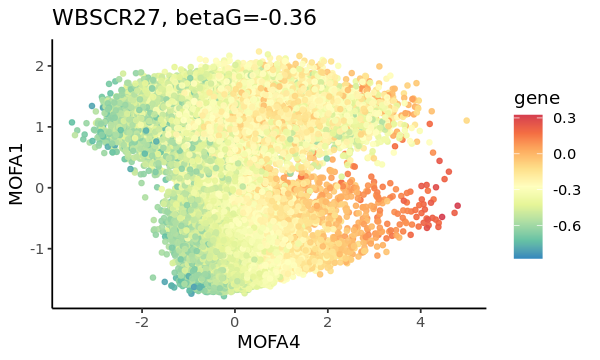

In [33]:
options(repr.plot.width = 5, repr.plot.height = 3)
for (name in genes){
    gene = colnames(df)[grep(name, colnames(df))]
#     print(gene)
    df_to_plot = cbind(df_pcs, data.frame(gene = df_beta[gene,]+df[,gene]))
#     print(head(df_to_plot))
    p = ggplot(df_to_plot, aes(x = MOFA4, y = MOFA1, col = gene)) 
    p = p + geom_point(alpha = 0.9, size = 1.2) + ggtitle(paste0(name, ", betaG=", round(df_beta[gene,], digits=2)))
    p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
    print(p)
}

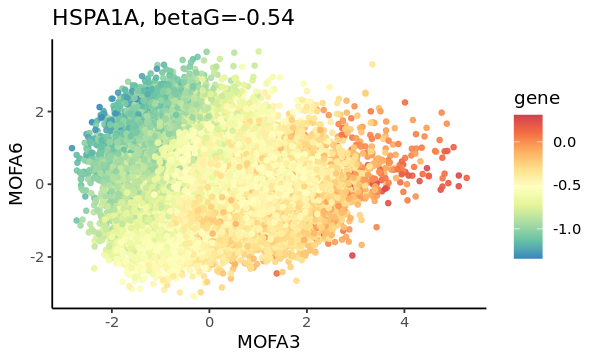

In [28]:
options(repr.plot.width = 5, repr.plot.height = 3)
for (name in genes){
    gene = colnames(df)[grep(name, colnames(df))]
#     print(gene)
    df_to_plot = cbind(df_pcs, data.frame(gene = df_beta[gene,]+df[,gene]))
#     print(head(df_to_plot))
    p = ggplot(df_to_plot, aes(x = MOFA3, y = MOFA6, col = gene)) 
    p = p + geom_point(alpha = 0.9, size = 1.2) + ggtitle(paste0(name, ", betaG=", round(df_beta[gene,], digits=2)))
    p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
    print(p)
}

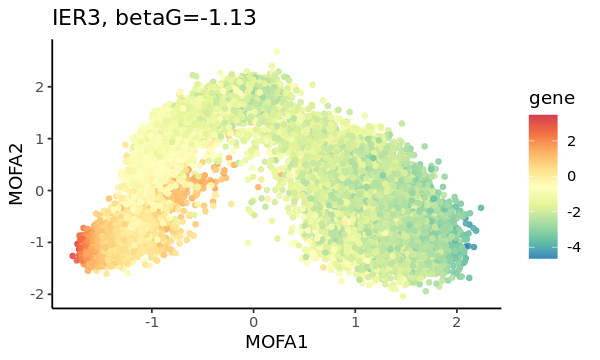

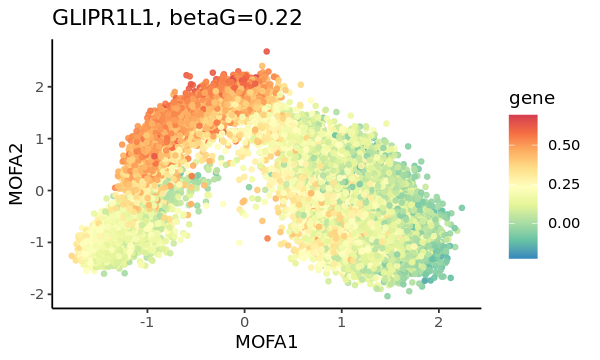

In [23]:
options(repr.plot.width = 5, repr.plot.height = 3)
for (name in genes){
    gene = colnames(df)[grep(name, colnames(df))]
#     print(gene)
    df_to_plot = cbind(df_pcs, data.frame(gene = df_beta[gene,]+df[,gene]))
#     print(head(df_to_plot))
    p = ggplot(df_to_plot, aes(x = MOFA1, y = MOFA2, col = gene)) 
    p = p + geom_point(alpha = 0.9, size = 1.2) + ggtitle(paste0(name, ", betaG=", round(df_beta[gene,], digits=2)))
    p = p + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
    print(p)
}

In [ ]:
##############################################################################
##############################################################################
##############################################################################
##############################################################################

In [17]:
### betaG's across cells from model 
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_persistent_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df_beta,2)

,beta_G
ENSG00000005059_CCDC109B-4_110648632_T_A,-0.005477985
ENSG00000006016_CRLF1-19_18735221_G_T,-0.056811980


In [ ]:
###### Plot beta_G + beta_GxC, different scale for each